In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
#Define constants
m = 39.95*1.68*10**(-27)
epsilon = 119.8/1.381*10**(-23)
sigma = 3.405 #angstrom
h = 10**-6 #Timestep
#Potential function

def r(x,y):
    r_pos = np.sqrt(x**2+y**2)
    return r_pos

def Grad_potential(x_1, y_1, x_2, y_2, epsilon = 119.8/1.381*10**(-23), sigma = 3.405):
    direction = np.array([[x_1 - x_2], [y_1 - y_2]])
    r = np.sqrt((x_1 - x_2)**2+(y_1 - y_2)**2)
    U_partial_r = -4 *epsilon* (12*(sigma)**(12)*(r)**(-13) - (sigma)**(6)*(r)**(-7))
    grad_U = U_partial_r * direction *r**(-1)
    return grad_U


def boxcheck (x, y):
    x_upper_limit = 5.0
    y_upper_limit = 5.0
    
    x_lower_limit = 0
    y_lower_limit = 0
    
    l = x_upper_limit - x_lower_limit #length of the box, only works for squares
    
    if x < x_upper_limit and x > x_lower_limit:
        if y < y_upper_limit and y > y_lower_limit:
            return np.array([x, y])
        if y > y_upper_limit:
            return np.array([x, y -l])
        if y < y_lower_limit:
            return np.array([x, y +l])
    if x > x_upper_limit:
        if ( y < y_upper_limit and y > y_lower_limit):
            return np.array([x- l, y])
        if y > y_upper_limit:
            return np.array([x- l, y - l])
        if y < y_lower_limit:
            return np.array([x- l, y + l])
    if x < x_lower_limit:
        if ( y < y_upper_limit and y > y_lower_limit):
            return np.array([x + l, y])
        if y > y_upper_limit:
            return np.array([x + l, y - l])
        if y < y_lower_limit:
            return np.array([x + l, y + l])

        
        
#Class for argon particles
        
class Particle:
    
    mass = 39.95*1.68*10**(-27)
    def __init__(self, x, y, vx, vy):
        self.x = x
        self.y = y
        self.vx = vx
        self.vy = vy
        

In [4]:
# Loop to initialize the particles


n_particles = 5

particles = []

for i in range(n_particles):
    
    x = random.uniform(0, 5.0)
    y = random.uniform(0, 5.0)
    position = np.array([[x],[y]])

    vx = random.uniform(-5.0, 5.0)
    vy = random.uniform(-5.0, 5.0)
    velocity = np.array([[vx],[vy]])
    particle = Particle(position[0], position[1],velocity[0] , velocity[1])
    particles.append(particle)
    
particles_array = np.array(particles)

In [6]:
timesteps = 100

for i in range(timesteps): #after each step i the particles will move
    for j in range(n_particles): #finding the new values of velocity and position for each particle j
        total_acceleration_x = 0
        total_acceleration_y = 0
        new_x = particles_array[j].x[-1] + particles_array[j].vx[ -1]*h
        new_y = particles_array[j].y[-1] + particles_array[j].vy[ -1]*h

        for k in range(n_particles): #evaluating the net force acting on the particle j from the interacion with all other particles
            if k != j:
                acceleration = Grad_potential(particles_array[j].x[-1], particles_array[j].y[-1], particles_array[k].x[-1], particles_array[k].y[-1])/m
                total_acceleration_x += acceleration[0]
                total_acceleration_y += acceleration[1]
       
        
        
        new_vel_x = particles_array[j].vx[-1] - total_acceleration_x*h
        new_vel_y = particles_array[j].vy[-1] - total_acceleration_y*h

        
        
        particles[j].x = np.append(particles_array[j].x, new_x)
        particles[j].y = np.append(particles_array[j].y, new_y)

        particles[j].vx = np.append(particles_array[j].vx, new_vel_x)
        particles[j].vy = np.append(particles_array[j].vy, new_vel_y)

        


Text(0, 0.5, 'y position')

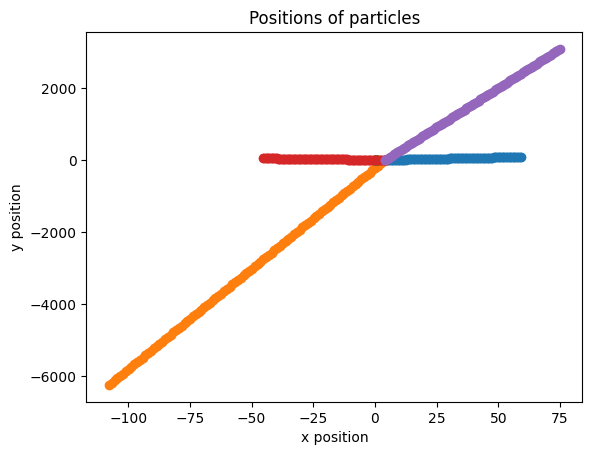

In [10]:
for i in range(n_particles):
    plt.scatter(particles_array[i].x, particles_array[i].y)
plt.title("Positions of particles")
plt.xlabel("x position")
plt.ylabel("y position")

In [8]:
print(particles_array[0].x)

[ 4.44771753  4.44771584  4.72521421  5.28021394  5.83562199  6.39103128
  6.94644059  7.5018499   8.05725921  8.61266851  9.16807782  9.72348713
 10.27889643 10.83430574 11.38971505 11.94512436 12.50053366 13.05594297
 13.61135228 14.16676159 14.72217089 15.2775802  15.83298951 16.38839881
 16.94380812 17.49921743 18.05462674 18.61003604 19.16544535 19.72085466
 20.27626396 20.83167327 21.38708258 21.94249189 22.49790119 23.0533105
 23.60871981 24.16412912 24.71953842 25.27494773 25.83035704 26.38576634
 26.94117565 27.49658496 28.05199427 28.60740357 29.16281288 29.71822219
 30.2736315  30.8290408  31.38445011 31.93985942 32.49526872 33.05067803
 33.60608734 34.16149665 34.71690595 35.27231526 35.82772457 36.38313387
 36.93854318 37.49395249 38.0493618  38.6047711  39.16018041 39.71558972
 40.27099903 40.82640833 41.38181764 41.93722695 42.49263625 43.04804556
 43.60345487 44.15886418 44.71427348 45.26968279 45.8250921  46.38050141
 46.93591071 47.49132002 48.04672933 48.60213863 49.